In [1]:
%load_ext autoreload
%autoreload 2
from imports import *
%run simcodes/MultiBandSim.py

In [ ]:
cluster = SSHCluster(
                ["dodo3"],
                connect_options={"known_hosts": None},
                scheduler_options={"port": 0, "dashboard_address": ":8797"}
            )

In [ ]:
stars = pd.read_csv('data/query_1610017978.44685i.txt',skiprows=6,sep='\t')
stars['field']=stars['# ID'].str.split('-').apply(lambda x:x[1])
stars['Iband']=stars['# ID'].apply(lambda x:'data/ogle/I/'+x+'.dat')
stars['Vband']=stars['# ID'].apply(lambda x:'data/ogle/V/'+x+'.dat')
stars = stars[stars['field']=='BLG']
Analysis = pd.DataFrame()
Nreps = 10
Percents = [20,25,30,35,40,45,50,100][:1]
stats = ['mean','median','std','sem']
cluster = SSHCluster(
                ["dodo3"],
                connect_options={"known_hosts": None},
                scheduler_options={"port": 0, "dashboard_address": ":8797"}
            )
for i in stars.index[:1]:
        print(stars.loc[i,'# ID'],end='\t')
        inds = []
        try:
            Iband = pd.read_csv(stars.loc[i,'Iband'],names=['t','mag','magerr'],sep=' ')
            Iband['filt'] = 'I'
            inds.append(0)
        except:
            print('No I')
            Iband = None
        try:
            Vband = pd.read_csv(stars.loc[i,'Vband'],names=['t','mag','magerr'],sep=' ')
            Vband['filt']= 'V'
            inds.append(1)
        except:
            print('No V')
            Vband=None
        if len(inds)==2:
            D=pd.concat([Iband,Vband])
        elif len(inds)==1:
            D = [Iband,Vband][inds[0]]
        else:
            continue
        file = 'data/ogle/sources/'+stars.loc[i,'# ID']+'.dat'
        D.to_csv(file)
        N_I = (D['filt']=='I').count()
        N_V = (D['filt']=='V').count()
        Nmax = N_I+ N_V
        Sim = MCSimulation('data/ogle/sources/', stars.loc[i,'P_1'], file)
        #sims=np.unique(np.round(Nmax*Percents).astype(int))
        
        
        Dict = {'Name':stars.loc[i,'# ID'],'OGLE period':stars.loc[i,'P_1'],'LS period':Sim.best_fitting[1],'N_I':N_I,'N_V':N_V}
        for Per in Percents:
            ok = False
            for _ in range(3):
                try:
                    Sim.produce_bootstrap([Per],Nreps)
                    Sim.run_simulation('slow',cluster=cluster )
                    Stat = Sim.Simulated_periods.groupby('N').agg(stats)
                    ok = True
                except:
                    print(Per,'Fail',end='\t')
                if ok:
                    for st in stats:
                        Dict[f'{Per} '+st] = Stat.loc[Stat.index[0],('P',st)]
                    break
        print('ok')
        Analysis = Analysis.append(Dict, ignore_index=True)

distributed.deploy.ssh - INFO - distributed.scheduler - INFO - -----------------------------------------------
distributed.deploy.ssh - INFO - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
distributed.deploy.ssh - INFO - /home/ktisanic/anaconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8797 is already in use.
distributed.deploy.ssh - INFO - Perhaps you already have a cluster running?
distributed.deploy.ssh - INFO - Hosting the HTTP server on port 38479 instead
distributed.deploy.ssh - INFO - warnings.warn(
distributed.deploy.ssh - INFO - distributed.scheduler - INFO - -----------------------------------------------
distributed.deploy.ssh - INFO - distributed.scheduler - INFO - Clear task state
distributed.deploy.ssh - INFO - distributed.scheduler - INFO -   Scheduler at: tcp://192.168.200.106:43761


OGLE-BLG-RRLYR-00001	

In [ ]:
plt.errorbar(Analysis['OGLE period'],Analysis['100 median'],yerr=Analysis['100 sem'],fmt='.',label='N=100')
#plt.errorbar(Analysis['OGLE period'],Analysis['20 median'],yerr=Analysis['20 sem'],fmt='.',label='N=20')
plt.plot(*2*(np.linspace(0,1),))
plt.legend()
plt.figure()
plt.errorbar(Analysis['OGLE period'],Analysis['100 median']/Analysis['OGLE period'],yerr=Analysis['100 sem']/Analysis['OGLE period'],fmt='.',label='N=100')
plt.errorbar(Analysis['OGLE period'],Analysis['20 median']/Analysis['OGLE period'],yerr=Analysis['20 sem']/Analysis['OGLE period'],fmt='.',label='N=20')
#plt.plot(*2*(np.linspace(0,1),))
plt.legend()
plt.axhline(1.)
fig, ax = plt.subplots(1,1,figsize=(10,10))
for s in ['20','50']:
    ax.errorbar(np.log10(Analysis['100 median']/Analysis['OGLE period']),np.log10(Analysis[s+' median']/Analysis['OGLE period']),
                 yerr=Analysis[s+' sem']/Analysis[s+' median']/np.log(10.),
                 xerr=Analysis['100 sem']/Analysis['100 median']/np.log(10.),fmt='o',label='N='+s,elinewidth=0.5)
#plt.plot(*2*(np.linspace(0,1),))
ax.legend()
ax.set_xlabel('log(N=100/OGLE)')
ax.set_ylabel('log(N/OGLE)')
ax.plot(*2*(np.linspace(-1,1),))

In [7]:
stars = pd.read_csv('data/query_1610017978.44685i.txt',skiprows=6,sep='\t')
stars['field']=stars['# ID'].str.split('-').apply(lambda x:x[1])
stars['Iband']=stars['# ID'].apply(lambda x:'data/ogle/I/'+x+'.dat')
stars['Vband']=stars['# ID'].apply(lambda x:'data/ogle/V/'+x+'.dat')
stars = stars[stars['field']=='BLG']
Analysis = pd.DataFrame()
Nreps = 10
Percents = [20,30,50,100]
i=0
print(stars.loc[stars.index[0],'# ID'],end='\t')

OGLE-BLG-RRLYR-00001	

In [22]:
Analysis.columns

Index(['100 mean', '100 median', '100 sem', '100 std', '20 mean', '20 median',
       '20 sem', '20 std', '30 mean', '30 median', '30 sem', '30 std',
       '50 mean', '50 median', '50 sem', '50 std', 'LS period', 'N_I', 'N_V',
       'Name', 'OGLE period'],
      dtype='object')

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 8.]),
 array([-4.42314970e-01, -3.98075684e-01, -3.53836398e-01, -3.09597111e-01,
        -2.65357825e-01, -2.21118539e-01, -1.76879253e-01, -1.32639967e-01,
        -8.84006807e-02, -4.41613946e-02,  7.78915876e-05]),
 <a list of 10 Patch objects>)

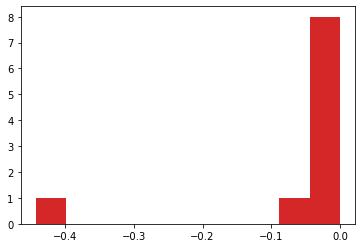

In [36]:
plt.hist(Analysis['100 median']/Analysis['OGLE period']-1)
plt.hist(Analysis['50 median']/Analysis['OGLE period']-1)

plt.hist(Analysis['30 median']/Analysis['OGLE period']-1)
plt.hist(Analysis['20 median']/Analysis['OGLE period']-1)

In [ ]:
Analysis